# Lab 2 / Background

PHYS 427\
1/21/2020 (Tue)\
Jin Kyoung Lee

In [1]:
# Importing libraries
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

### 1. Mathematical proof of ABCD method

If there is a distribution of two different variables, x and y, we can divide the xy-plane into four regions, A, B, C, and D, to find out the background of the distribution.

Text(0, 0.5, 'random dataY')

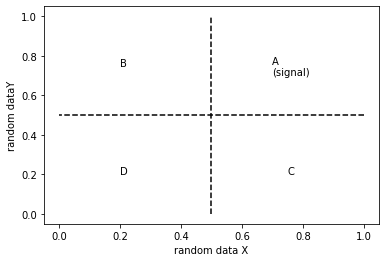

In [2]:
# Creating sample plot to show how the regions are divided

def dottedLine(x1,x2,y1,y2): # Defining functino for dotted line dividing the region
    plt.plot([x1,x2], [y1,y2], '--k')

def region(region,x,y): # Defining function for labeling the region
    plt.annotate(region, xy = (x,y))

# Plotting the sample plot
dottedLine(0.5,0.5,0,1)
dottedLine(1,0,0.5,0.5)

# Labeling the regions
region("A\n(signal)",0.7,0.7)
region("B",0.2,0.75)
region("D",0.2,0.2)
region("C",0.75,0.2)

# Labeling x and y axis
plt.xlabel('random data X')
plt.ylabel('random dataY')

From above four regions, we can look for the background distribution by showing that B/D = A/C, as long as f(x,y) = f_1(x) * f_2(y) is satisfied.

To prove that B/C = A/C, when f(x,y) = f_1(x) * f_2(y), first, we assume that the xy-plane goes from (0,0) to (b,b), and also assume that the line that divides the region is at x = a, and y = a. Then, we can find out the total count of each region by integrating each region.

$f(x,y) = f_1(x) f_2(y)$\
\
Region B : Integrating $f_1(x)$ from $0$ to $a$ and $f_2(y)$ from $a$ to $b$\
$\int_{a}^{b} \int_{0}^{a} f(x,y) dx dy = \int_{0}^{a} f_1(x) dx \int_{a}^{b} f_2(y) dy = [F_1(a) - F_1(0)] [F_2(b) - F_2(a)]$\
\
Region D: Integrating $f_1(x)$ from $0$ to $a$ and $f_2(y)$ from $0$ to $a$\
$\int_{0}^{a} \int_{0}^{a} f(x,y) dx dy = \int_{0}^{a} f_1(x) dx \int_{0}^{a} f_2(y) dy = [F_1(a) - F_1(0)] [F_2(a) - F_2(0)]$\
\
Region A: Integrating $f_1(x)$ from $a$ to $b$ and $f_2(y)$ from $a$ to $b$\
$\int_{a}^{b} \int_{a}^{b} f(x,y) dx dy = \int_{a}^{b} f_1(x) dx \int_{a}^{b} f_2(y) dy = [F_1(b) - F_1(a)] [F_2(b) - F_2(a)]$\
\
Region C: Integrating $f_1(x)$ from $0$ to $a$ and $f_2(y)$ from $0$ to $a$\
$\int_{0}^{a} \int_{a}^{b} f(x,y) dx dy = \int_{a}^{b} f_1(x) dx \int_{0}^{a} f_2(y) dy = [F_1(b) - F_1(a)] [F_2(a) - F_2(0)]$\
\
$\frac{B}{D} = \frac{[F_1(a) - F_1(0)][F_2(b) - F_2(a)]}{[F_1(a) - F_1(0)][F_2(a) - F_2(0)]} = \frac{[F_2(b) - F_2(a)]}{[F_2(a) - F_2(0)]}$\
\
$\frac{A}{C} = \frac{[F_1(b) - F_1(a)][F_2(b) - F_2(a)]}{[F_1(b) - F_1(a)][F_2(a) - F_2(0)]} = \frac{[F_2(b) - F_2(a)]}{[F_2(a) - F_2(0)]}$

From above results, we can see that $\frac{B}{D} = \frac{A}{C}$

### 2. Estimating background from data using ABCD method

In [3]:
# Defining function for ABCD method
def abcd(arrX,arrY):
    
    # Getting the number of points that are in the region less than 0.6
    filtLessX = filter(lambda x:x<0.6, randDataX) # x < 0.6
    lessX = list(filtLessX)
    filtLessY = filter(lambda y:y<0.6, randDataY) # y < 0.6
    lessY = list(filtLessY)
    
    # Getting the number of points taht are in the region greater than 0.6
    filtGreaterX = filter(lambda x:x>0.6, randDataX) # x > 0.6
    greaterX = list(filtGreaterX)
    filtGreaterY = filter(lambda y:y>0.6, randDataY) # y > 0.6
    greaterY = list(filtGreaterY)
    
    # Finding the area of each region to get the ratio (B/D = A/C)
    regionAreaB = len(lessX) * len(greaterY)
    regionAreaC = len(greaterX) * len(lessY)
    regionAreaA = len(greaterX) * len(greaterY)
    regionAreaD = len(lessX) * len(lessY)
    
    # Calculating the ratio (B/C = A/C)
    ratioBD = regionAreaB / regionAreaD
    ratioAC = regionAreaA / regionAreaC
    
    # Calculating the number of points that are in region A by using ratio
    if ratioBD == ratioAC:
        pointsCountA = len(greaterY)
        pointsDeductA = len(lessX) * (1 - ratioBD)
        countRegionA = pointsCountA - pointsDeductA
        return round(countRegionA)
    else:
        return

In [4]:
# Generating two random uniform distributions (1000 entries between 0 and 1)
randDataX = np.random.uniform(0,1,1000)
randDataY = np.random.uniform(0,1,1000)

Text(0, 0.5, 'Random uniform distribution Y')

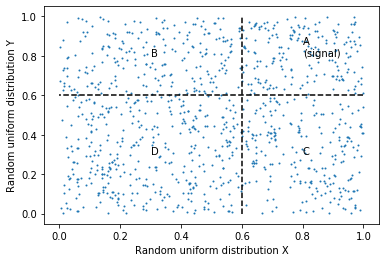

In [5]:
# Plotting scatterplot of two random data
plt.scatter(randDataX,randDataY,s=1)

dottedLine(0.6,0.6,0,1) # x = 0.6
dottedLine(1,0,0.6,0.6) # y = 0.6

region("A\n(signal)",0.8,0.8)
region("B",0.3,0.8)
region("C",0.8,0.3)
region("D",0.3,0.3)

plt.xlabel('Random uniform distribution X')
plt.ylabel('Random uniform distribution Y')

In [6]:
 # Using the function abcd() to compare the actual and predicted number of points in region A
actualA = abcd(randDataX,randDataY)
print("The actual number of counts of region A is", actualA)

The actual number of counts of region A is 214


In [7]:
predictedA = 160
diffA = actualA - predictedA
print("The difference is", diffA)

The difference is 54


### 3. Iterating 1000 times and finding the distribution of difference

In [8]:
# Iterating 1000 times
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,1000)
    randDataY = np.random.uniform(0,1,1000)
    predictedA = 160 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff) # putting the outputs into one list

Text(0, 0.5, 'Frequency')

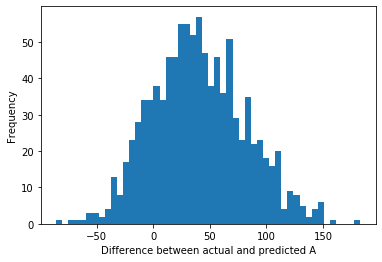

In [9]:
# Plotting the histogram of difference
plt.hist(diffList, bins = 50)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')

In [10]:
sigma = np.std(diffList)
print("std =", sigma)

std = 41.108963061600086


From the above histogram, it is observed that the resulting histogram of difference between actual number of points and predicted number of points of region A looks gaussian; however, it cannot be said that this is exactly a gaussian distribution because it is not symmetrical about the mean.  Also, the negative values indicates that the actual number of points in region A is less than the predicted number of points.

### 4. Varying the size of the statistics

starting with 10 events, then do 100, 500, 1000, 5000, 10000, 50000

(I have not fully understood part 4, and also was not sure about varying the size of the statistics, therefore, I have increased the data size and looked up for its standard deviation. Also, for part 4, I have used the same code for every event, so it will look very unorganized. Will work on more on defining function in python.)

13.436215985164871


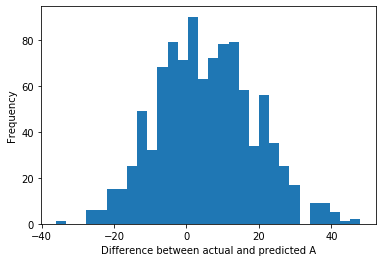

In [11]:
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,100)
    randDataY = np.random.uniform(0,1,100)
    predictedA = 16 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff)
    
# Plotting the histogram of difference
plt.hist(diffList, bins = 30)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')
sigma = np.std(diffList)
print(sigma)

41.73609755355668


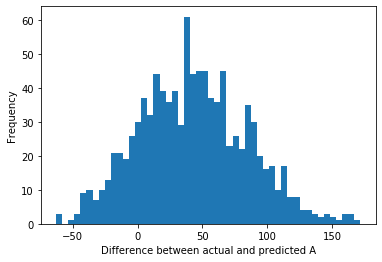

In [12]:
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,1000)
    randDataY = np.random.uniform(0,1,1000)
    predictedA = 160 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff)
    
# Plotting the histogram of difference
plt.hist(diffList, bins = 50)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')
sigma = np.std(diffList)
print(sigma)

93.3518630558598


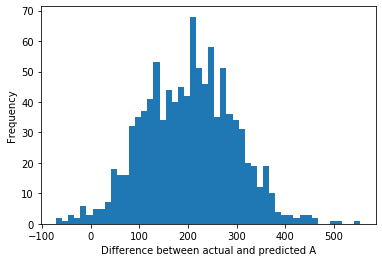

In [13]:
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,5000)
    randDataY = np.random.uniform(0,1,5000)
    predictedA = 800 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff)
    
# Plotting the histogram of difference
plt.hist(diffList, bins = 50)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')
sigma = np.std(diffList)
print(sigma)

126.10574457969787


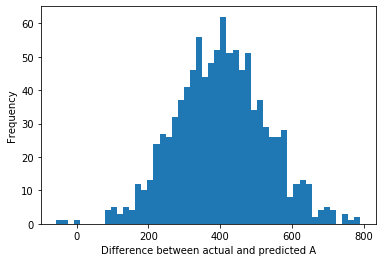

In [14]:
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,10000)
    randDataY = np.random.uniform(0,1,10000)
    predictedA = 1600 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff)
    
# Plotting the histogram of difference
plt.hist(diffList, bins = 50)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')
sigma = np.std(diffList)
print(sigma)

291.01317667590246


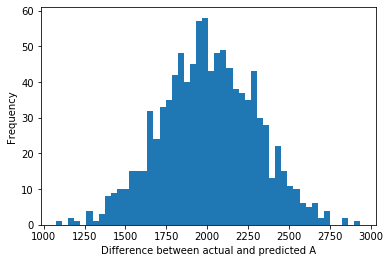

In [15]:
diffList = []
for _ in range(1000):
    randDataX = np.random.uniform(0,1,50000)
    randDataY = np.random.uniform(0,1,50000)
    predictedA = 8000 # predicted number of points in region A
    countA = abcd(randDataX,randDataY)
    diff = countA - predictedA
    diffList.append(diff)
    
# Plotting the histogram of difference
plt.hist(diffList, bins = 50)
plt.xlabel('Difference between actual and predicted A')
plt.ylabel('Frequency')
sigma = np.std(diffList)
print(sigma)